In [44]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [45]:
KEYS = [
    'entity_id',
    'financial_report_id',
    'financial_statement_id',
    'entity_ico',
    'entity_name']

DIMENSIONS = [
    'year',
    # 'month',
    # 'financial_report_order_number',
    'period_length',
    # 'consolidated',
    # 'approved_date',
    'type',
    'financial_report_template_id',
    # 'establishment_date',
    # 'cancellation_date',
    # 'sknace_code',
    # 'entity_state',
    'legal_form_code',
    'org_size_code',
    'ownership_category_code',
    'entity_consolidated',
    # 'sknace_division_name',
    'sknace_division',
    # 'sknace_subcategory',
    'sal_class',
    'is_mahalanobis_outlier',
    'is_z_score_outlier',
    'is_isolation_forest_outlier']

PRIMARY_VALUES = [
    'CA',
    'CASH',
    'CL',
    'EQ',
    'NCL',
    'TA',
    'TL',
    'CC',
    'INV',
    'CF_NETTO',
    'CF_SELFFIN',
    'EAT',
    'EBIT',
    'SAL',
    'COST',
    'INT',
    'YIE',
    'LABOR']

RATIOS = [
    'L3',
    'L2',
    'L1',
    'CF_CL',
    'CASH_TA',
    'SAL_TA',
    'TL_SAL',
    'INV_COST',
    'INV_SAL',
    'CC_SAL',
    'TA_SAL',
    'TL_TA',
    'CF_TL',
    'CL_TA',
    'NCL_TA',
    'EQ_TL',
    'EQ_TA',
    'CL_CC',
    'ROE',
    'EAT_TA',
    'ROA_BRUTTO',
    'CF_TA',
    'CF_SAL',
    'ROS',
    'EAT_YIE',
    'ROI',
    'ROA_NETTO',
    'LABOR_PRODUCTIVITY']


In [46]:
training_raw = pd.read_csv('../../DATA/FINAL/training_sample.csv')
testing_raw = pd.read_csv('../../DATA/FINAL/testing_sample.csv')
training_raw

,entity_id,year,month,financial_report_id,financial_report_template_id,CA,CASH,CL,EQ,NCL,TA,TL,CC,INV,CF_NETTO,CF_SELFFIN,EAT,EBIT,SAL,COST,INT,YIE,LABOR,L3,L2,L1,CF_CL,CASH_TA,SAL_TA,TL_SAL,INV_COST,INV_SAL,CC_SAL,TA_SAL,TL_TA,CF_TL,CL_TA,NCL_TA,EQ_TL,EQ_TA,EBIT_INT,CL_CC,ROE,EAT_TA,ROA_BRUTTO,CF_TA,CF_SAL,ROS,EAT_YIE,ROI,ROA_NETTO,LABOR_PRODUCTIVITY,financial_statement_id,financial_report_order_number,entity_ico,period_length,consolidated,approved_date,type,entity_name,establishment_date,cancellation_date,sknace_code,entity_state,legal_form_code,org_size_code,ownership_category_code,entity_consolidated,sknace_division_name,sknace_division,sknace_subcategory,DPHZ_vat_registration_cancelled,DPHZ_vat_registration_cancelled_1y_off,DPHZ_vat_registration_cancelled_2y_off,DPHZ_vat_registration_cancelled_3y_off,RU_event,RU_event_1y_off,RU_event_2y_off,RU_event_3y_off,cancellation_year,RUZ_cancelled,RUZ_cancelled_1y_off,RUZ_cancelled_2y_off,RUZ_cancelled_3y_off,sal_class,establishment_year,is_mahalanobis_outlier,is_z_score_outlier,is_isolation_forest_outlier,RUZ_indirect_criteria,RUZ_indirect_criteria_1y_off,RUZ_indirect_criteria_2y_off,RUZ_indirect_criteria_3y_off,combined_issue_criteria_1y_off,combined_issue_criteria_2y_off,combined_issue_criteria_3y_off,plausible_sample
0,27971.0,2018.0,1.0,6791492,699.0,824851.0,137120.0,564418.0,17376.0,46374.0,875393.0,846466.0,673298.0,11072.0,13087.0,9028.0,2651.0,6710.0,3031963.0,3007396.0,8218.0,3031970.0,370870.0,1.461419,1.435847,0.242941,0.023187,0.156638,3.463545,0.279181,1.325373,1.314633,0.222067,103.939751,0.966955,0.015461,0.644760,0.052975,0.020528,0.019849,1.816500,0.838289,0.152567,0.003028,0.007665,0.014950,0.004316,0.000874,0.000874,0.012416,0.003028,0.122320,4101516.0,1.0,652423.0,12.0,NaN,2019-06-28,Riadna,KUHO - mix. spol. s r.o.,1991-06-25,NaN,49410.0,NaN,112.0,2.0,2.0,False,Pozemná doprava a doprava potrubím,H,49.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,0,0,0,0,2. Malý,1991,False,False,False,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,71752.0,2015.0,1.0,5058691,699.0,912862.0,2213.0,48840.0,2399.0,18406.0,948368.0,945969.0,910649.0,0.0,-35846.0,-38726.0,-57122.0,-54242.0,2134583.0,2202672.0,67110.0,2179262.0,12114.0,18.690868,18.690868,0.045311,-0.733948,0.002333,2.250796,0.443163,0.000000,0.000000,0.426617,159.943408,0.997470,-0.037893,0.051499,0.019408,0.002536,0.002530,0.191745,0.053632,-23.810754,-0.060232,-0.057195,-0.037798,-0.016793,-0.026760,-0.026212,0.010532,-0.060232,0.005675,2703097.0,1.0,36584649.0,12.0,NaN,2016-03-10,Riadna,FeCom s.r.o.,2004-10-08,NaN,46720.0,NaN,112.0,0.0,8.0,False,"Veľkoobchod, okrem motorových vozidiel a motoc...",G,46.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,NaN,0,0,0,0,2. Malý,2004,False,False,False,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,72912.0,2017.0,1.0,6351388,699.0,1481047.0,1630.0,1326396.0,-718007.0,549510.0,1521883.0,2239890.0,1417869.0,61548.0,47298.0,44418.0,10312.0,13192.0,4512342.0,4460274.0,32121.0,4512573.0,692228.0,1.116595,1.070192,0.001229,0.035659,0.001071,2.964973,0.496392,4.967695,4.910372,0.314220,121.417632,1.471789,0.021116,0.871549,0.361072,-0.320555,-0.471789,1.410697,0.935486,-0.014362,0.006776,0.008668,0.031079,0.010482,0.002285,0.002285,0.027882,0.006776,0.153408,3748560.0,1.0,35904798.0,12.0,NaN,2018-06-21,Riadna,"WETRON, s.r.o.",2004-10-23,NaN,33200.0,NaN,112.0,0.0,8.0,False,Oprava a inštalácia strojov a prístrojov,C,33.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,0,0,0,0,2. Malý,2004,False,False,False,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,81349.0,2017.0,1.0,6370373,699.0,514945.0,13348.0,82348.0,597059.0,278564.0,1595777.0,998718.0,501597.0,0.0,339656.0,326252.0,46443.0,59847.0,2017657.0,1883181.0,34235.0,2017735.0,250683.0,6.253279,6.253279,0.162093,4.124642,0.008365,1.264373,0.494989,0.000000,0.000000,0.248604,284.726155,0.625851,0.340092,0.051604,0.174563,0.597825,0.374149,2.748123,0.164172,0.077786,0.029104,0.037503,0.212847,0.168342,0.023018,0.023017,0.050557,0.029104,0.124245,3765328.0,1.0,36266388.0,12.0,NaN,NaN,Riadna,LINE - Molnár s.

In [47]:
SAL_CLASSES = training_raw['sal_class'].unique()
SKNACE_GROUPS = training_raw['sknace_division'].unique()

In [48]:
training_cleaned = training_raw.query('is_mahalanobis_outlier == False and is_z_score_outlier == False and is_isolation_forest_outlier == False and financial_report_template_id == 699 and sknace_division != "other"')
testing_cleaned = testing_raw.query('is_mahalanobis_outlier == False and is_z_score_outlier == False and is_isolation_forest_outlier == False and financial_report_template_id == 699 and sknace_division != "other"')

In [49]:
mean_values = dict()

for sal_class in SAL_CLASSES:
    for sknace in SKNACE_GROUPS:
        subset_training = training_cleaned.query('sal_class == @sal_class and sknace_division == @sknace')
        segment_mean_values = dict()
        for col in RATIOS:
            mean_value = subset_training[col].mean()
            # if np.isnan(mean_value): print(sal_class, sknace, col)
            segment_mean_values[col] = mean_value
        
        mean_values[(sal_class, sknace)] = segment_mean_values
    


In [50]:
training_filled = pd.DataFrame()
testing_filled = pd.DataFrame()


for sal_class in SAL_CLASSES:
    for sknace in SKNACE_GROUPS:
        subset_training = training_cleaned.query('sal_class == @sal_class and sknace_division == @sknace')
        subset_testing = testing_cleaned.query('sal_class == @sal_class and sknace_division == @sknace')
        segment_mean_values = mean_values[(sal_class, sknace)]
        for col in RATIOS:
            mean_value = segment_mean_values[col]
            subset_training[col] = subset_training[col].fillna(mean_value)
            subset_testing[col] = subset_testing[col].fillna(mean_value)

        training_filled = pd.concat([training_filled, subset_training], axis = 0)
        testing_filled = pd.concat([testing_filled, subset_testing], axis = 0)

C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_11820\4138243076.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_training[col] = subset_training[col].fillna(mean_value)
C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_11820\4138243076.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_testing[col] = subset_testing[col].fillna(mean_value)


In [158]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# Q = training_filled.query('combined_issue_criteria_3y_off == 1')['entity_id'].nunique()

# control_group_ratio = 2

# training_balanced = (
#     pd.concat(
#         [
#             training_filled.query('combined_issue_criteria_3y_off == 0').sample(int(Q * control_group_ratio)),
#             training_filled.query('combined_issue_criteria_3y_off == 1').sample(Q),
#         ], axis = 0
#     )
# )


# Q_test = testing_filled.query('combined_issue_criteria_3y_off == 1')['entity_id'].nunique()

# testing_balanced = (
#     pd.concat(
#         [
#             testing_filled.query('combined_issue_criteria_3y_off == 0').sample(int(Q_test * control_group_ratio)),
#             testing_filled.query('combined_issue_criteria_3y_off == 1').sample(Q_test),
#         ], axis = 0
#     )
# )


# X_train_balanced = training_balanced[RATIOS].values
# y_train_balanced = training_balanced['combined_issue_criteria_3y_off'].values

# X_test_balanced = testing_balanced[RATIOS].values
# y_test_balanced = testing_balanced['combined_issue_criteria_3y_off'].values

X_train_imbalanced = training_filled[RATIOS].values
y_train_imbalanced = training_filled['combined_issue_criteria_3y_off'].values

X_test_imbalanced = testing_filled[RATIOS].values
y_test_imbalanced = testing_filled['combined_issue_criteria_3y_off'].values


from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train_imbalanced, y_train_imbalanced)
X_test_balanced, y_test_balanced = smote.fit_resample(X_test_imbalanced, y_test_imbalanced)



In [159]:
print(X_train_balanced.shape, X_test_balanced.shape)
print(X_train_imbalanced.shape, X_test_imbalanced.shape)

(11260, 28) (2826, 28)
(6466, 28) (1597, 28)


In [160]:
print(pd.Series(y_test_balanced).value_counts())
print(pd.Series(y_test_imbalanced).value_counts())

print(pd.Series(y_train_balanced).value_counts())
print(pd.Series(y_train_imbalanced).value_counts())

0.0    1413
1.0    1413
dtype: int64
0.0    1413
1.0     184
dtype: int64
1.0    5630
0.0    5630
dtype: int64
0.0    5630
1.0     836
dtype: int64


In [161]:

from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer, f1_score

In [162]:
from sklearn.metrics import fbeta_score, make_scorer

# Create a custom scorer for use in GridSearchCV or RFECV
f2_scorer = make_scorer(fbeta_score, beta=2)

In [164]:
# Define a custom scoring function
def custom_score(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    # Weight recall more heavily
    return 0.7 * recall + 0.3 * accuracy

custom_scorer = make_scorer(custom_score, greater_is_better=True)

In [166]:
def eval(real, pred, label):
    recall = recall_score(real, pred)
    accuracy = accuracy_score(real, pred)
    print(f"{label} Accuracy:", accuracy)
    print(f"{label} Precision:", precision_score(real, pred))
    print(f"{label} Recall:", recall)
    print(f"{label} Balanced Accuracy:", balanced_accuracy_score(real, pred))
    print(f"{label} F1 Score:", f1_score(real, pred))
    print(f"{label} F2 Score:", fbeta_score(real, pred, beta=2))
    print(f"{label} Custom Scorer:", 0.7 * recall + 0.3 * accuracy)

    cm = confusion_matrix(real, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(label)
    plt.show()

## Random Forest Classifier

Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1]
Balanced train Accuracy: 0.9576376554174068
Balanced train Precision: 0.9481648982431727
Balanced train Recall: 0.9682060390763766
Balanced train Balanced Accuracy: 0.9576376554174068
Balanced train F1 Score: 0.958080674927498
Balanced train F2 Score: 0.964130319431179
Balanced train Custom Scorer: 0.9650355239786856


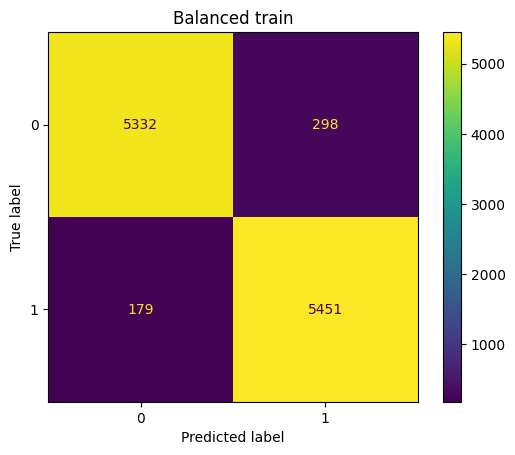

Balanced test Accuracy: 0.7820240622788394
Balanced test Precision: 0.8180367118914605
Balanced test Recall: 0.7254069355980184
Balanced test Balanced Accuracy: 0.7820240622788394
Balanced test F1 Score: 0.7689422355588897
Balanced test F2 Score: 0.7422157856625633
Balanced test Custom Scorer: 0.7423920736022647


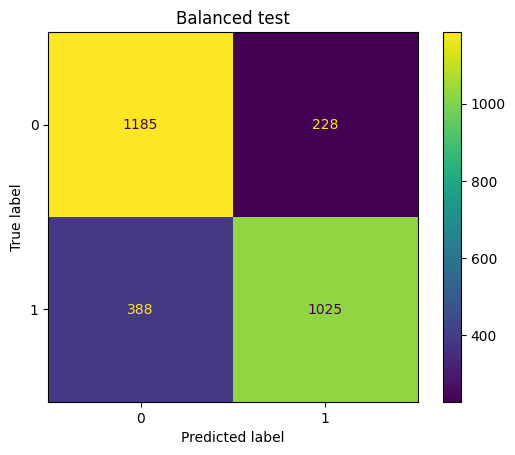

Imbalanced test Accuracy: 0.8065122103944896
Imbalanced test Precision: 0.311178247734139
Imbalanced test Recall: 0.5597826086956522
Imbalanced test Balanced Accuracy: 0.6992118988276563
Imbalanced test F1 Score: 0.4
Imbalanced test F2 Score: 0.4826616682286786
Imbalanced test Custom Scorer: 0.6338014892053034


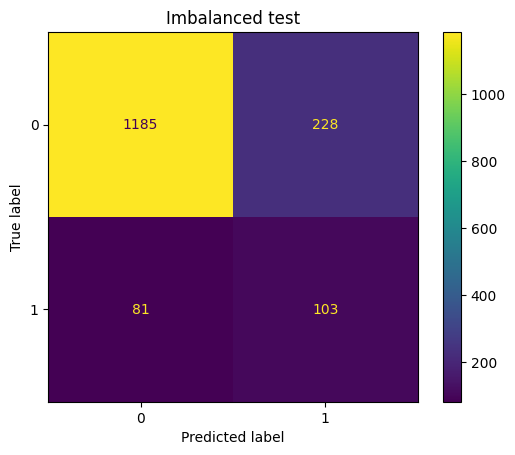

In [167]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = (RandomForestClassifier(
    random_state=42,
    max_depth=  15,
    max_features= 'sqrt',
    min_samples_leaf= 1,
    min_samples_split= 15,
    n_estimators= 50))

# Create RFECV object with Random Forest as the estimator
rf_rfe = RFECV(estimator=rf, step=2, cv=5, scoring=custom_scorer, n_jobs=4)

# Fit RFECV
rf_rfe.fit(X_train_balanced, y_train_balanced)

# Transform the data
X_train_selected = rf_rfe.transform(X_train_balanced)
X_test_selected = rf_rfe.transform(X_test_imbalanced)
X_test_selected_balanced = rf_rfe.transform(X_test_balanced)

# Train a new classifier using only selected features
rf_final = (RandomForestClassifier(
    random_state=42,
    max_depth=  15,
    max_features= 'sqrt',
    min_samples_leaf= 1,
    min_samples_split= 15,
    n_estimators= 50))

rf_final.fit(X_train_selected, y_train_balanced)

# Predict and calculate accuracy
y_pred = rf_final.predict(X_test_selected)
y_pred_balanced = rf_final.predict(X_test_selected_balanced)
y_pred_train = rf_final.predict(X_train_selected)

print("Selected Features:", rf_rfe.support_)
print("Feature Ranking:", rf_rfe.ranking_)


eval(y_train_balanced, y_pred_train, 'Balanced train')
eval(y_test_balanced, y_pred_balanced, 'Balanced test')
eval(y_test_imbalanced, y_pred, 'Imbalanced test')

In [168]:

X_train_selected = rf_rfe.transform(X_train_balanced)

In [169]:
from sklearn.model_selection import GridSearchCV
# first testing
# param_grid = {
#     'n_estimators': [20, 50, 100],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# param_grid = {
#     'n_estimators': [50, 100, 120],
#     'max_depth': [None, 15, 20],
#     'min_samples_split': [2, 10, 15],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

param_grid = {
    'max_depth': [None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5, 10, 12, 15],
    'n_estimators': [50, 80, 100, 110, 120]
    }



rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=4, verbose=10, scoring=f2_scorer)
grid_search.fit(X_train_selected, y_train_balanced)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [155]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 120}

In [156]:
# Extract grid search results
cv_results = pd.DataFrame(grid_search.cv_results_)

# Display grid search results
# print(cv_results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

# Sort by rank to see the best combinations first
sorted_cv_results = cv_results.sort_values(by='rank_test_score')
sorted_cv_results.head(20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.986201,0.024887,0.030190,0.010101,None,sqrt,1,10,120,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.491184,0.554156,0.605493,0.564516,0.561097,0.555289,0.036743,1
24,0.970550,0.042401,0.034253,0.005514,None,sqrt,1,15,120,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.505051,0.552070,0.587121,0.564516,0.563910,0.554534,0.027218,2
27,0.785841,0.012343,0.033715,0.001021,None,sqrt,2,2,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.482846,0.559748,0.600000,0.549313,0.578358,0.554053,0.039566,3
23,0.894261,0.022437,0.031431,0.009368,None,sqrt,1,15,110,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.516373,0.540201,0.603985,0.560399,0.547170,0.553625,0.028954,4
9,0.994164,0.010752,0.031451,0.010699,None,sqrt,1,5,120,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.490566,0.544431,0.587121,0.563119,0.579800,0.553007,0.034515,5
47,0.794838,0.044360,0.032630,0.001730,None,sqrt,2,15,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.491803,0.554156,0.612500,0.556946,0.546482,0.552378,0.038322,6
48,0.877327,0.033986,0.028098,0.006563,None,sqrt,2,15,110,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.498737,0.557644,0.607769,0.554863,0.535264,0.550856,0.035386,7
37,0.887190,0.038401,0.030354,0.007120,None,sqrt,2,10,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.500000,0.529634,0.606250,0.548628,0.568750,0.550653,0.035861,8
22,0.821026,0.038533,0.025810,0.008245,None,sqrt,1,15,100,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.494297,0.568750,0.605493,0.551425,0.530973,0.550188,0.037142,9
39,1.411643,0.124711,0.043722,0.012684,None,sqrt,2,10,120,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.488579,0.542929,0.594493,0.559006,0.565920,0.550186,0.035033,10


In [143]:
head = cv_results.head(10)

new_params = dict()

for param_name in ['param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators']:
    new_params[param_name] = list(head[param_name].unique())

display(new_params)      


{'param_max_depth': [None],
 'param_max_features': ['sqrt'],
 'param_min_samples_leaf': [1, 2],
 'param_min_samples_split': [2, 10, 15],
 'param_n_estimators': [50, 100, 120]}

Imbalanced test Accuracy: 0.8353162179085786
Imbalanced test Precision: 0.36042402826855124
Imbalanced test Recall: 0.5543478260869565
Imbalanced test Balanced Accuracy: 0.7131257884857995
Imbalanced test F1 Score: 0.43683083511777304
Imbalanced test F2 Score: 0.5004906771344455


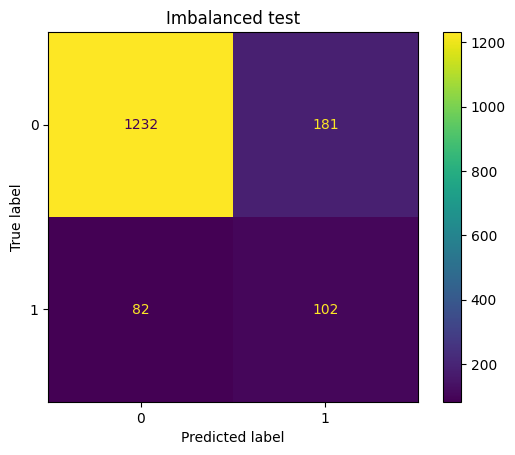

In [157]:
eval(y_test_imbalanced, grid_search.best_estimator_.predict(X_test_selected), 'Imbalanced test')

In [ ]:
# Train a new classifier using only selected features
rf_final = (RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=5,
    min_samples_split = 5,
    min_samples_leaf= 2))

rf_final.fit(X_train_selected, y_train_balanced)

# Predict and calculate accuracy
y_pred = rf_final.predict(X_test_selected)
y_pred_balanced = rf_final.predict(X_test_selected_balanced)
y_pred_train = rf_final.predict(X_train_selected)

print("Selected Features:", rf_rfe.support_)
print("Feature Ranking:", rf_rfe.ranking_)


eval(y_train_balanced, y_pred_train, 'Balanced train')
eval(y_test_balanced, y_pred_balanced, 'Balanced test')
eval(y_test_imbalanced, y_pred, 'Imbalanced test')